K-Nearest Neighbors is an algorithm for supervised learning. Where the data is 'trained' with data points corresponding to their classification. Once a point is to be predicted, it takes into account the 'K' nearest points to it to determine it's classification.

Here's an visualization of the K-Nearest Neighbors algorithm.


In this case, we have data points of Class A and B. We want to predict what the star (test data point) is. If we consider a k value of 3 (3 nearest data points) we will obtain a prediction of Class B. Yet if we consider a k value of 6, we will obtain a prediction of Class A.

In this sense, it is important to consider the value of k. But hopefully from this diagram, you should get a sense of what the K-Nearest Neighbors algorithm is. It considers the 'K' Nearest Neighbors (points) when it predicts the classification of the test point.

About the dataset
Imagine a telecommunications provider has segmented its customer base by service usage patterns, categorizing the customers into four groups. If demographic data can be used to predict group membership, the company can customize offers for individual prospective customers. It is a classification problem. That is, given the dataset, with predefined labels, we need to build a model to be used to predict class of a new or unknown case.

The example focuses on using demographic data, such as region, age, and marital, to predict usage patterns.

The target field, called custcat, has four possible values that correspond to the four customer groups, as follows: 1- Basic Service 2- E-Service 3- Plus Service 4- Total Service

Our objective is to build a classifier, to predict the class of unknown cases. We will use a specific type of classification called K nearest neighbour.

Lets download the dataset. To download the data, we will use !wget to download it from IBM Object Storage.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
%matplotlib inline

In [2]:
# !wget -O teleCust1000t.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv
teleCust= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv"

In [4]:
df=pd.read_csv(teleCust)
df.head()

region  tenure  age  marital  address  income  ed  employ  retire  gender  \
0       2      13   44        1        9    64.0   4       5     0.0       0   
1       3      11   33        1        7   136.0   5       5     0.0       0   
2       3      68   52        1       24   116.0   1      29     0.0       1   
3       2      33   33        0       12    33.0   2       0     0.0       1   
4       2      23   30        1        9    30.0   1       2     0.0       0   

   reside  custcat  
0       2        1  
1       6        4  
2       2        3  
3       1        1  
4       4        3

In [7]:
df.shape

(1000, 12)

In [8]:
df["custcat"].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

In [10]:
df.describe()

region       tenure          age      marital      address  \
count  1000.0000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      2.0220    35.526000    41.684000     0.495000    11.551000   
std       0.8162    21.359812    12.558816     0.500225    10.086681   
min       1.0000     1.000000    18.000000     0.000000     0.000000   
25%       1.0000    17.000000    32.000000     0.000000     3.000000   
50%       2.0000    34.000000    40.000000     0.000000     9.000000   
75%       3.0000    54.000000    51.000000     1.000000    18.000000   
max       3.0000    72.000000    77.000000     1.000000    55.000000   

            income           ed       employ       retire       gender  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean     77.535000     2.671000    10.987000     0.047000     0.517000   
std     107.044165     1.222397    10.082087     0.211745     0.499961   
min       9.000000     1.000000     0.000000     0.000000     0.000000   
25%      29.000000     2.000000     3.000000     0.000000     0.000000   
50%      47.000000     3.000000     8.000000     0.000000     1.000000   
75%      83.000000     4.000000    17.000000     0.000000     1.000000   
max    1668.000000     5.000000    47.000000     1.000000     1.000000   

            reside      custcat  
count  1000.000000  1000.000000  
mean      2.331000     2.487000  
std       1.435793     1.120306  
min       1.000000     1.000000  
25%       1.000000     1.000000  
50%       2.000000     3.000000  
75%       3.000000     3.000000  
max       8.000000     4.000000

In [5]:
x=df.drop(columns="custcat")
print(x.head())

   region  tenure  age  marital  address  income  ed  employ  retire  gender  \
0       2      13   44        1        9    64.0   4       5     0.0       0   
1       3      11   33        1        7   136.0   5       5     0.0       0   
2       3      68   52        1       24   116.0   1      29     0.0       1   
3       2      33   33        0       12    33.0   2       0     0.0       1   
4       2      23   30        1        9    30.0   1       2     0.0       0   

   reside  
0       2  
1       6  
2       2  
3       1  
4       4  


In [39]:
print(df.head())

   region  tenure  age  marital  address  income  ed  employ  retire  gender  \
0       2      13   44        1        9    64.0   4       5     0.0       0   
1       3      11   33        1        7   136.0   5       5     0.0       0   
2       3      68   52        1       24   116.0   1      29     0.0       1   
3       2      33   33        0       12    33.0   2       0     0.0       1   
4       2      23   30        1        9    30.0   1       2     0.0       0   

   reside  custcat  
0       2        1  
1       6        4  
2       2        3  
3       1        1  
4       4        3  


In [6]:

X = preprocessing.StandardScaler().fit(x).transform(x.astype(float))
X

array([[-0.02696767, -1.055125  ,  0.18450456, ..., -0.22207644,
        -1.03459817, -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243, ..., -0.22207644,
        -1.03459817,  2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601, ..., -0.22207644,
         0.96655883, -0.23065004],
       ...,
       [ 1.19883553,  1.47425216,  1.37948227, ..., -0.22207644,
         0.96655883, -0.92747794],
       [ 1.19883553,  1.61477311,  0.58283046, ..., -0.22207644,
         0.96655883, -0.92747794],
       [ 1.19883553,  0.67796676, -0.45281689, ..., -0.22207644,
         0.96655883,  0.46617787]])

Train Test Split
Out of Sample Accuracy is the percentage of correct predictions that the model makes on data that that the model has NOT been trained on. Doing a train and test on the same dataset will most likely have low out-of-sample accuracy, due to the likelihood of being over-fit.

It is important that our models have a high, out-of-sample accuracy, because the purpose of any model, of course, is to make correct predictions on unknown data. So how can we improve out-of-sample accuracy? One way is to use an evaluation approach called Train/Test Split. Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set.

This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,df["custcat"],test_size=0.1,random_state=0)
print('Train set:', X_train.shape,  Y_train.shape)
print('Test set:', X_test.shape,  Y_test.shape)

Train set: (900, 11) (900,)
Test set: (100, 11) (100,)


In [8]:
from sklearn.neighbors import KNeighborsClassifier

Training
Lets start the algorithm with k=4 for now:

In [9]:
k=4
neigh=KNeighborsClassifier(n_neighbors=k)
neigh.fit(X_train,  Y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

Predicting
we can use the model to predict the test set:

In [10]:
yhat=neigh.predict(X_test)

In [11]:
yhat

array([3, 1, 2, 4, 2, 1, 3, 1, 3, 1, 2, 1, 3, 2, 1, 4, 1, 4, 1, 3, 2, 1,
       4, 3, 4, 1, 4, 3, 2, 1, 1, 2, 4, 4, 1, 3, 1, 4, 3, 1, 1, 4, 1, 3,
       3, 3, 1, 4, 1, 1, 3, 3, 1, 4, 3, 3, 2, 4, 1, 3, 1, 1, 3, 4, 3, 1,
       1, 1, 4, 1, 2, 3, 3, 2, 2, 4, 2, 2, 3, 1, 1, 1, 4, 1, 3, 3, 2, 1,
       2, 1, 3, 4, 3, 1, 3, 1, 2, 1, 3, 1, 3, 3, 1, 4, 1, 4, 4, 2, 3, 3,
       2, 3, 4, 1, 1, 4, 1, 2, 4, 3, 4, 1, 3, 3, 3, 3, 2, 4, 1, 3, 4, 1,
       4, 3, 2, 1, 1, 3, 1, 1, 3, 1, 4, 4, 2, 1, 2, 3, 2, 3, 2, 1, 2, 4,
       1, 2, 1, 2, 4, 3, 1, 4, 2, 2, 3, 2, 1, 3, 3, 1, 1, 3, 4, 1, 4, 3,
       3, 2, 4, 1, 1, 2, 1, 2, 3, 2, 1, 3, 3, 1, 1, 4, 2, 2, 3, 1, 1, 2,
       3, 2, 1, 4, 1, 3, 2, 1, 1, 1, 4, 3, 2, 3, 3, 2, 4, 3, 4, 1, 1, 3,
       3, 1, 3, 3, 2, 3, 1, 2, 3, 4, 3, 1, 1, 1, 1, 2, 3, 1, 1, 1, 4, 3,
       1, 2, 4, 1, 2, 1, 3, 3, 2, 4, 1, 3, 1, 3, 4, 2, 1, 1, 2, 4, 2, 4,
       1, 1, 3, 4, 3, 1, 3, 3, 3, 1, 4, 3, 1, 2, 1, 4, 1, 1, 1, 1, 2, 3,
       3, 2, 1, 1, 3, 3, 4, 3, 4, 1, 1, 1, 3, 4], d

Accuracy evaluation
In multilabel classification, accuracy classification score is a function that computes subset accuracy. This function is equal to the jaccard_score function. Essentially, it calculates how closely the actual labels and predicted labels are matched in the test set.

In [12]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(Y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, yhat))

Train set Accuracy:  0.5742857142857143
Test set Accuracy:  0.33666666666666667


In [25]:
Ks = 20
value_k=range(0,Ks)
mean_acc = np.zeros((Ks))
std_acc = np.zeros((Ks))
for k in range(1,Ks):
    neigh=KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train,Y_train)
    yhat=neigh.predict(X_test)
    mean_acc[k]=metrics.accuracy_score(Y_test,yhat)
    std_acc[k]=np.std(yhat==Y_test)/np.sqrt(yhat.shape[0])

In [26]:
list(value_k)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [27]:
mean_acc

array([0.  , 0.21, 0.25, 0.26, 0.29, 0.29, 0.28, 0.27, 0.31, 0.31, 0.33,
       0.31, 0.35, 0.32, 0.28, 0.25, 0.32, 0.32, 0.3 , 0.35])

In [28]:
std_acc

array([0.        , 0.04073082, 0.04330127, 0.04386342, 0.04537621,
       0.04537621, 0.04489989, 0.04439595, 0.04624932, 0.04624932,
       0.04702127, 0.04624932, 0.04769696, 0.04664762, 0.04489989,
       0.04330127, 0.04664762, 0.04664762, 0.04582576, 0.04769696])

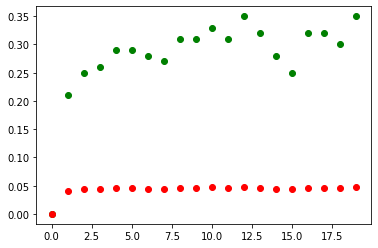

In [29]:
plt.plot(value_k,mean_acc,'go')
plt.plot(value_k,std_acc,'ro')